# Assignment 2

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below

In [1]:
student = {
    'name' : "Esra" ,
    'surname' : "Sekerci", 
    'studentNumber' : "2698215"
}

print(student)

{'name': 'Esra', 'surname': 'Sekerci', 'studentNumber': '2698215'}


## Average perceptron [25]

We have already seen the perceptron algorithm for the binary classification problem. The pseudo code is below:

Pseudo-code for the binary perceptron algorithm is shown below. (example code for this is available in tutorials)

----

- Start $\boldsymbol{w}=0$
- For each epoch $t = 0, 1, 2, \dots, T$:
  - For each example index $i \in \{1,\dots,n\}$ in random order:
    - If: $y^{(i)} (\pmb{w}^T \pmb{x}^{(i)}) \leq 0$
        - $\pmb{w}=\pmb{w}+y^{(i)} \boldsymbol{x}^{(i)}$
    - Else:
        - $\pmb{w}=\pmb{w}$
- return $\pmb{w}$

----

Perceptron is sensitive to the latest examples it sees. Average perceptron algorithm is a derivation of the perceptron that overcomes this problem. Average perceptron returns the average value of  $\pmb{w}$ obtained in all iterations.

-----

- Start $\boldsymbol{w}=0$,  $\boldsymbol{w}_s=0$
- For each epoch $t = 0, 1, 2, \dots, T$:
  - For each example index $i \in \{1,\dots,n\}$ in random order:
    - If: $y^{(i)} (\pmb{w}^T \pmb{x}^{(i)}) \leq 0$
        - $\pmb{w}=\pmb{w}+y^{(i)} \boldsymbol{x}^{(i)} $
    - Else:
        - $\pmb{w}=\pmb{w}$
    - $\pmb{w}_s = \pmb{w}_s + \pmb{w}$
- return  $\cfrac{\pmb{w_s}}{(nT)}$

-----

1. Implement *average perceptron* algorithm

2. Your labels on the IRIS dataset will be

   $y = \begin{cases} +1 & \text{target = virginica} \\ -1 & \text{target = setosa} \end{cases}$

   arrange the dataset accordingly. (example shown below)

3. You will use all features in the IRIS dataset (note that in the tutorial we only used petal length and petal width, now you will use all of them.)

4. Divide the dataset into training and test sets.

5. Train both *perceptron* and *average perceptron* on the IRIS training dataset, and report both of their performance in terms of TPR (sensitivity) and TNR (specificity) on the test dataset. 

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.lines as lines
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import PolynomialFeatures

In [3]:
iris = datasets.load_iris()
X = iris["data"]  # All features
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# Select only setosa and virginica classes
setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]

y[y == 0] = -1 # Set label -1 for setosa class
y[y == 2] = 1 # Set label +1 for virginica class

In [5]:
iris["data"].shape

(150, 4)

In [6]:
iris["data"][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [9]:
def perceptron(x,y, max_epochs = 100):
    n = len(y) # Number of examples
    d = x.shape[1] # Number of features
    w = np.zeros(d) # Initial weights
    for epoch in range(max_epochs):
        rev = 0 # Keep track of number of weight revisions in an epoch
        for i in np.random.permutation(n):
            if y[i]*w.dot(x[i]) <= 0:
                rev += 1
                w = w + y[i]*x[i]
        # If no revisions made in an epoch break
        if rev == 0:
            print("Complete in {} epochs: no weight revisions in epoch".format(epoch+1))
            return w
    print("Complete in {} epochs: maximum number of epochs reached".format(max_epochs))
    return w

In [10]:
perceptron_w = perceptron(X_train, y_train)
print("Weights:", perceptron_w)

Complete in 2 epochs: no weight revisions in epoch
Weights: [-1.6 -4.2  7.2  3.4]


In [11]:
def performance(x,y,w):
    h = np.sign(x.dot(w))
    return np.mean(h == y)

In [12]:
performance(X_test, y_test, perceptron_w)

1.0

In [13]:
predictions = np.sign(X_test.dot(perceptron_w))

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Positives (tp)",tp)
print("False Positives (fp)",fp)
print("False Negatives(fn)",fn)
print("True Negatives (tn)",tn)

True Positives (tp) 13
False Positives (fp) 0
False Negatives(fn) 0
True Negatives (tn) 17


In [15]:
def average_perceptron(x, y, max_epochs=100):
    n = len(y)
    d = x.shape[1]  # Number of features
    w = np.zeros(d)  # Initial weights
    w_s = np.zeros(d)  # Sum of weights
    for epoch in range(max_epochs):
        rev = 0  # Keep track of number of weight revisions in an epoch
        for i in np.random.permutation(n):
            if y[i] * np.dot(w, x[i]) <= 0:
                rev += 1
                w += y[i] * x[i]
        # Update the sum of weights
        w_s += w
        # If no revisions made in an epoch, break
        if rev == 0:
            print("Complete in {} epochs: no weight revisions in epoch".format(epoch + 1))
            return w_s / (n * (epoch + 1))
    print("Complete in {} epochs: maximum number of epochs reached".format(max_epochs))
    return w_s / (n * max_epochs)

In [16]:
avgperceptron_w = average_perceptron(X_train, y_train)
print(avgperceptron_w)

Complete in 2 epochs: no weight revisions in epoch
[-0.02142857 -0.04428571  0.09571429  0.05142857]


In [17]:
performance(X_test, y_test, avgperceptron_w)

1.0

In [18]:
predictions = np.sign(X_test.dot(avgperceptron_w))

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Positives (tp)",tp)
print("False Positives (fp)",fp)
print("False Negatives(fn)",fn)
print("True Negatives (tn)",tn)

True Positives (tp) 13
False Positives (fp) 0
False Negatives(fn) 0
True Negatives (tn) 17


In [20]:
def tnr_tpr(X_test, y_test, weights):
    tn, fp, fn, tp = confusion_matrix(y_test, np.sign(np.dot(X_test, weights))).ravel()
    tnr = tn / (tn + fp)
    tpr = tp / (tp + fn)
    return tnr, tpr

In [21]:
tnr, tpr = tnr_tpr(X_test, y_test, perceptron_w)
print("TNR:", tnr)
print("TPR:", tpr)

TNR: 1.0
TPR: 1.0


In [22]:
tnr, tpr = tnr_tpr(X_test, y_test, avgperceptron_w)
print("TNR:", tnr)
print("TPR:", tpr)

TNR: 1.0
TPR: 1.0


## Multiclass perceptron [25]

A multiclass perceptron uses the same framework, but it can be used to predict any number of classes rather than just two. Suppose the labels $y$ in our dataset can take $m$ different values $ y \in \{l_1, \dots, l_m\}$. In this case the perceptron will have a weight vector for each possible label value $\pmb{w}_{l_1}, \dots, \pmb{w}_{l_m}$, and the predicted class for a particular feature vector $\pmb{x}$ will be the label of the weight vector that has maximum dot product with the feature vector i.e. $\hat{y}=\arg \max_{l_{k}}(\boldsymbol{w_{l_{k}}}^T \boldsymbol{x})$. (Note that $\hat{y}$ denotes the predicted label).

The learning algorithm will be as follows, we will have a weight vector for each class label, and all of those label vectors will start with zero values. Then for each data point, it will check whether the predicted label is the same as the actual label, and if not, it will update the weights associated with the predicted label. Pseudo-code for multiclass perceptron is shown below:

---

- Start $\pmb{w}_{l_k}=0$ for $k = 1, \dots, m$
- For each epoch $t = 0, 1, 2, \dots$:
  - For each example index $i \in \{1,\dots,n\}$ in random order:
    - Compute the predicted label: $\hat{y}^{(i)} = \arg \max_{l_{k}}(\boldsymbol{w_{l_{k}}}^T \boldsymbol{x}^{(i)})$
    - If: $\hat{y}^{(i)} \neq y^{(i)} $
        - $w_{y^{(i)}}:=w_{y^{(i)}}+ \boldsymbol{x}^{(i)}$
        - $ w_{\hat{y}^{(i)}}:=w_{\hat{y}^{(i)}}- \boldsymbol{x}^{(i)}$
- 
    - Else:
        - $w_{y^{(i)}}:=w_{y^{(i)}}$

---
1. Implement multiclass perceptron algorithm
2. Your labels on the IRIS dataset will be

   $$y = \begin{cases} 0 & \text{target = setosa} \\ 1 & \text{target = versicolor} \\ 2 & \text{target = virginica}\end{cases}$$

   Note that the dataset you load from `sklearn` already has these labels. Again you will use all features

3. Divide the dataset into training and test sets.
4. Train *multiclass perceptron* and report its overall accuracy for all labels.

In [23]:
# Importing the dataset for multiclass perceptron
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

In [24]:
def multiclass_perceptron(X_train, y_train, num_classes, max_epochs=100):
    num_features = X_train.shape[1]
    # Initialize weight vectors for each class
    weights = np.zeros((num_classes, num_features))
    
    for epoch in range(max_epochs):
        for i in np.random.permutation(len(y_train)):
            x_i = X_train[i]
            y_i = y_train[i]
            # Compute predicted label
            y_hat = np.argmax(np.dot(weights, x_i))
            
            if y_hat != y_i:
                # Update weights for the correct and predicted classes
                weights[y_i] += x_i
                weights[y_hat] -= x_i
                
    return weights

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
num_classes = len(np.unique(y_train))

In [27]:
weights = multiclass_perceptron(X_train, y_train, num_classes)

In [28]:
def predict(X, weights):
    return np.argmax(np.dot(X, weights.T), axis=1)

In [29]:
y_pred = predict(X_test, weights)

accuracy = np.mean(y_pred == y_test)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.9777777777777777


## Features [30]

Download and open the `auto-mpgm.csv` dataset. The dataset contains several different features about cars. The aim is to predict `mpg` the labels of which are $+1$ for fuel efficient cars and $-1$ is for cars with high mpg. Origin variable is 1 = USA, 2 = Europe, 3 = Asia. Other features are self explanatory. 

> 1. mpg binary
> 2. cylinders discrete
> 3. displacement continuous
> 4. horsepower continuous
> 5. weight continuous
> 6. acceleration continuous
> 7. model year discrete
> 8. origin discrete

1. How would you represent each feature shown above (except mpg which is the label)? Possible options include standardization, one-hot encoding, use them as they are, drop them. 
2. Apply the encoding and standardization to the feature you indicate in the previous question.
3. Split the data into training and test sets. Use *perceptron* and *average perceptron* algorithms on the training data and report their performance in terms of TPR and TNR in the test data.
4. Perform a 10-fold cross-validation on the data and report TPR and TNR.
5. Try applying polynomial features and see how the performance changes. 

In [30]:
# Opening auto dataset assuming that it is in the same folder as this notebook.
# You can read it using pandas. 
import pandas as pd

auto_pd = pd.read_csv('auto-mpgm.csv')
auto_pd.head()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17496\1977961953.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-1.0,8.0,304.0,193.0,4732.0,18.5,70.0,1.0
1,-1.0,8.0,307.0,200.0,4376.0,15.0,70.0,1.0
2,-1.0,8.0,360.0,215.0,4615.0,14.0,70.0,1.0
3,-1.0,8.0,318.0,210.0,4382.0,13.5,70.0,1.0
4,-1.0,8.0,350.0,180.0,3664.0,11.0,73.0,1.0


In [31]:
auto_pd.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.000000,5.471939,388.348214,509.354592,2977.584184,15.541327,75.979592,1.576531
std,1.001278,1.705783,302.431814,334.078508,849.402560,2.758864,3.683737,0.805518
min,-1.000000,3.000000,97.500000,100.000000,1613.000000,8.000000,70.000000,1.000000
25%,-1.000000,4.000000,145.750000,147.250000,2225.250000,13.775000,73.000000,1.000000
50%,0.000000,4.000000,260.000000,650.000000,2803.500000,15.500000,76.000000,1.000000
75%,1.000000,8.000000,443.500000,840.000000,3614.750000,17.025000,79.000000,2.000000
max,1.000000,8.000000,980.000000,980.000000,5140.000000,24.800000,82.000000,3.000000


In [32]:
auto_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   origin        392 non-null    float64
dtypes: float64(8)
memory usage: 24.7 KB


In [33]:
auto_pd.isnull().sum()

mpg             1
cylinders       1
displacement    1
horsepower      1
weight          1
acceleration    1
model_year      1
origin          1
dtype: int64

In [34]:
auto_pd.shape

(393, 8)

In [35]:
rows_with_nans = auto_pd.isnull().any(axis=1)
auto_pd[rows_with_nans]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
auto_pd.dropna(inplace=True)
auto_pd.reset_index(drop=True, inplace=True)

In [37]:
features = auto_pd.drop(columns=['mpg'])
labels = auto_pd['mpg']
continuous_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
categorical_features = ['origin', 'model_year']

In [38]:
categories = [sorted(auto_pd[cat].unique()) for cat in categorical_features]

In [39]:
transformers = [
    ('standard_scaler', StandardScaler(), continuous_features),  # Standardization for continuous features
    ('one_hot_encoder', OneHotEncoder(categories=categories), categorical_features)    # One-hot encoding for categorical features
]

In [40]:
column_transformer = ColumnTransformer(transformers, remainder='passthrough')

In [41]:
pipeline = Pipeline([
    ('preprocessing', column_transformer)
])

In [42]:
transformed_features = pipeline.fit_transform(features)
transformed_feature_names = column_transformer.get_feature_names_out(input_features=features.columns)
auto_final_df = pd.concat([auto_pd['mpg'], pd.DataFrame(transformed_features, columns=transformed_feature_names)], axis=1)
auto_final_df.head()

,mpg,standard_scaler__cylinders,standard_scaler__displacement,standard_scaler__horsepower,standard_scaler__weight,standard_scaler__acceleration,one_hot_encoder__origin_1.0,one_hot_encoder__origin_2.0,one_hot_encoder__origin_3.0,one_hot_encoder__model_year_70.0,...,one_hot_encoder__model_year_73.0,one_hot_encoder__model_year_74.0,one_hot_encoder__model_year_75.0,one_hot_encoder__model_year_76.0,one_hot_encoder__model_year_77.0,one_hot_encoder__model_year_78.0,one_hot_encoder__model_year_79.0,one_hot_encoder__model_year_80.0,one_hot_encoder__model_year_81.0,one_hot_encoder__model_year_82.0
0,-1.0,1.483947,-0.279256,-0.948157,2.068110,1.073795,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,1.483947,-0.269324,-0.927177,1.648456,-0.196464,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,1.483947,-0.093854,-0.882220,1.930190,-0.559396,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,1.483947,-0.232906,-0.897206,1.655529,-0.740861,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,1.483947,-0.126962,-0.987120,0.809149,-1.648189,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X = auto_final_df.drop(columns=['mpg'])
y = auto_final_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [45]:
perceptron_weights = perceptron(X_train.values, y_train.values)
avg_perceptron_weights = average_perceptron(X_train.values, y_train.values)

Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached


In [46]:
y_pred_perceptron = np.sign(X_test.values.dot(perceptron_weights))
y_pred_avg_perceptron = np.sign(X_test.values.dot(avg_perceptron_weights))

In [47]:
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
conf_matrix_avg_perceptron = confusion_matrix(y_test, y_pred_avg_perceptron)
TPR_perceptron = conf_matrix_perceptron[1, 1] / (conf_matrix_perceptron[1, 1] + conf_matrix_perceptron[1, 0])
TNR_perceptron = conf_matrix_perceptron[0, 0] / (conf_matrix_perceptron[0, 0] + conf_matrix_perceptron[0, 1])
TPR_avg_perceptron = conf_matrix_avg_perceptron[1, 1] / (conf_matrix_avg_perceptron[1, 1] + conf_matrix_avg_perceptron[1, 0])
TNR_avg_perceptron = conf_matrix_avg_perceptron[0, 0] / (conf_matrix_avg_perceptron[0, 0] + conf_matrix_avg_perceptron[0, 1])

In [48]:
print("Perceptron:")
print("True Positive Rate (TPR):", TPR_perceptron)
print("True Negative Rate (TNR):", TNR_perceptron)

print("\nAverage Perceptron:")
print("True Positive Rate (TPR):", TPR_avg_perceptron)
print("True Negative Rate (TNR):", TNR_avg_perceptron)

Perceptron:
True Positive Rate (TPR): 0.803921568627451
True Negative Rate (TNR): 0.9104477611940298

Average Perceptron:
True Positive Rate (TPR): 0.9215686274509803
True Negative Rate (TNR): 0.9104477611940298


In [49]:
def calculate_tpr_tnr(y_true, y_pred):
    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
    conf_matrix = confusion_matrix(y_true, y_pred)
    TPR = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    TNR = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    return TPR, TNR

In [50]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
tpr_perceptron_list = []
tnr_perceptron_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    perceptron_weights = perceptron(X_train.values, y_train.values)
    y_pred_perceptron = np.sign(X_test.values.dot(perceptron_weights))

    tpr, tnr = calculate_tpr_tnr(y_test.values, y_pred_perceptron)
    tpr_perceptron_list.append(tpr)
    tnr_perceptron_list.append(tnr)

avg_tpr_perceptron = np.mean(tpr_perceptron_list)
avg_tnr_perceptron = np.mean(tnr_perceptron_list)
print("Perceptron:")
print("Average True Positive Rate (TPR):", avg_tpr_perceptron)
print("Average True Negative Rate (TNR):", avg_tnr_perceptron)

Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Perceptron:
Average True Positive Rate (TPR): 0.8585177035240974
Average True Negative Rate (TNR): 0.921700542038297


In [51]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
tpr_perceptron_list = []
tnr_perceptron_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    avg_perceptron_weights = average_perceptron(X_train.values, y_train.values)
    y_pred_avg_perceptron = np.sign(X_test.values.dot(avg_perceptron_weights))

    tpr, tnr = calculate_tpr_tnr(y_test.values, y_pred_avg_perceptron)
    tpr_perceptron_list.append(tpr)
    tnr_perceptron_list.append(tnr)

avg_tpr_perceptron = np.mean(tpr_perceptron_list)
avg_tnr_perceptron = np.mean(tnr_perceptron_list)
print("Average Perceptron:")
print("Average True Positive Rate (TPR):", avg_tpr_perceptron)
print("Average True Negative Rate (TNR):", avg_tnr_perceptron)
    

Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached


Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Average Perceptron:
Average True Positive Rate (TPR): 0.9377293117510508
Average True Negative Rate (TNR): 0.8831832154299326


In [52]:
degree = 2

poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
tpr_poly_list = []
tnr_poly_list = []

for train_index, test_index in kf.split(X_poly):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    perceptron_weights = perceptron(X_train, y_train.values)
    y_pred_perceptron = np.sign(X_test.dot(perceptron_weights))

    tpr, tnr = calculate_tpr_tnr(y_test.values, y_pred_perceptron)
    tpr_poly_list.append(tpr)
    tnr_poly_list.append(tnr)

avg_tpr_poly = np.mean(tpr_poly_list)
avg_tnr_poly = np.mean(tnr_poly_list)
print("\nPerceptron with Polynomial Features (Degree={}):".format(degree))
print("Average True Positive Rate (TPR):", avg_tpr_poly)
print("Average True Negative Rate (TNR):", avg_tnr_poly)

Complete in 58 epochs: no weight revisions in epoch


Complete in 98 epochs: no weight revisions in epoch
Complete in 100 epochs: maximum number of epochs reached
Complete in 97 epochs: no weight revisions in epoch
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 58 epochs: no weight revisions in epoch
Complete in 100 epochs: maximum number of epochs reached
Complete in 86 epochs: no weight revisions in epoch
Complete in 62 epochs: no weight revisions in epoch

Perceptron with Polynomial Features (Degree=2):
Average True Positive Rate (TPR): 0.9173937308783856
Average True Negative Rate (TNR): 0.9133442066811878


Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 100 epochs: maximum number of epochs reached
Complete in 27 epochs: no weight revisions in epoch
Complete in 100 epochs: maximum number of epochs reached
Complete in 92 epochs: no weight revisions in epoch
Complete in 77 epochs: no weight revisions in epoch
Complete in 70 epochs: no weight revisions in epoch
Complete in 100 epochs: maximum number of epochs reached
Complete in 43 epochs: no weight revisions in epoch
Complete in 100 epochs: maximum number of epochs reached

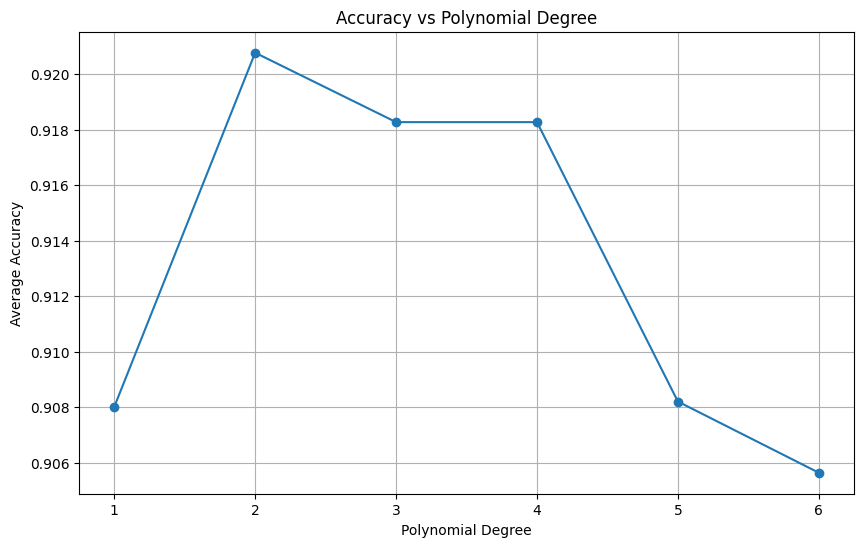

In [53]:
degrees = [1, 2, 3, 4, 5, 6]
accuracy_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        avg_perceptron_weights = average_perceptron(X_train, y_train.values)
        y_pred_avg_perceptron = np.sign(X_test.dot(avg_perceptron_weights))
        accuracy = accuracy_score(y_test, y_pred_avg_perceptron)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    accuracy_scores.append(avg_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, accuracy_scores, marker='o')
plt.title('Accuracy vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.xticks(degrees)
plt.show()

## Kernels [20]

Implement polynomial kernel algorithm 


In [54]:
def polynomial_kernel(x, y, d):
    return (np.dot(x, y) + 1) ** d

In [55]:
# You can test your kernel function below
# The answer should be 5132.95
x_1 = np.array([1, -0.5, 2, 4])
x_2 = np.array([3.5, 2.1, -1.3, 4.1])
polynomial_kernel(x_1, x_2, d=3)

5132.953125

Implement radial basis function kernel

In [56]:
def rbf_kernel(x, y, sigma=1.0):
    diff = x - y
    return np.exp(-np.dot(diff, diff) / (2 * sigma ** 2))

In [57]:
# You can test your kernel function below
# The answer should be 6.427017298776608e-06
rbf_kernel(x_1, x_2)

6.427017298776608e-06

## Bonus [30]

Implement the kernel perceptron algorithm below

---

- Start $\boldsymbol{\alpha}=\begin{bmatrix} 0 \\ \vdots \\ 0 \end{bmatrix}$
- For $t = 0, 1, 2, \dots$:
  - Select a random index $i \in \{1,\dots,n\}$
  - If: $\quad y^{(i)} \sum_{j=1}^n  \alpha_j y^{(j)} K(\pmb x^{(j)}, \pmb x^{(i)}) \leq 0$
    $$\alpha_i = \alpha_i + 1$$
  - Else:
   $$\alpha_i = \alpha_i $$
- return $\boldsymbol{\alpha}$

---




In [58]:
def kernel_perceptron(X, y, kernel, d, max_epochs=100):
    n = len(y) # Number of examples
    alpha = np.zeros(n) # Initial alpha values
    
    for epoch in range(max_epochs):
        for i in np.random.permutation(n):
            # Compute the prediction
            prediction = np.sum(alpha * y * kernel(X, X[i], d))
            
            # Update alpha if prediction is incorrect
            if y[i] * prediction <= 0:
                alpha[i] += 1
    
    return alpha

In [59]:
X = auto_final_df.drop(columns=['mpg'])
y = auto_final_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [61]:
alpha = kernel_perceptron(X_train.values, y_train.values, polynomial_kernel, d=2)

In [62]:
print("Final alpha values:", alpha)

Final alpha values: [ 0.  0.  0.  0.  2.  0.  1.  0.  5.  1.  1.  0.  0.  5.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  1.  0.
  0. 10.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.
  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  8.  0.
  1.  0.  0.  1.  2.  0.  1.  0.  0.  0.  0.  0. 10.  0.  0.  2.  1.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  9.  0.  0. 10.  0.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  3.  0.  0.  6.
  5.  1.  0.  0.  0.  1.  0.  0. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  9.  2.  0.  3.  0.  0. 19.  0.  0.  1.  0.  0.  0.  1.  1.  4.  1.  0.
  0.  2.  4.  3.  0.  0.  0.  0.  0.  1.  0.  0.  1.  3.  2.  0.  0.  1.
  0.  2.  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. 10.  1.  2.  0.
  0.  0.  0.  1.  0.  1.  2.  0.  0.  8.  0.  0.  2.  0.  0.  0.  1.  0.
  2.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  0.  0.  0.
  0.  6.  0.  4.  0.  0.  5.  0

In [63]:
def predict_labels(alpha, X_train, y_train, X_test):
    y_pred = []
    for x_test in X_test:
        prediction = 0
        for i in range(len(X_train)):
            prediction += alpha[i] * y_train[i] * polynomial_kernel(X_train[i], x_test, d=3)  # Using polynomial kernel function
        y_pred.append(np.sign(prediction))
    return np.array(y_pred)

In [64]:
y_pred_test = predict_labels(alpha, X_train.values, y_train.values, X_test.values)

In [65]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)

Accuracy: 0.8135593220338984
Confusion Matrix:
[[53 14]
 [ 8 43]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.87      0.79      0.83        67
         1.0       0.75      0.84      0.80        51

    accuracy                           0.81       118
   macro avg       0.81      0.82      0.81       118
weighted avg       0.82      0.81      0.81       118

